In [86]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import requests
import time
from tqdm import tqdm
import folium
from folium.plugins import MarkerCluster

In [87]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [88]:
raw_total = pd.read_excel("./data/crawling_raw.xlsx")
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [89]:
raw_total.shape

(8801, 5)

In [90]:
raw_total.dtypes

content    object
date       object
like       object
place      object
tags       object
dtype: object

In [91]:
raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8801 non-null   object
 1   date     8801 non-null   object
 2   like     8801 non-null   object
 3   place    2953 non-null   object
 4   tags     8801 non-null   object
dtypes: object(5)
memory usage: 343.9+ KB


In [92]:
# 해시태그 통합 저장
tags_total = []

for tag in raw_total["tags"]:
    # str을 리스트로 변환
    tag = eval(tag)
    tags_total.extend(tag)

In [93]:
tag_text = "['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행']"

In [94]:
type(eval(tag_text))

list

## 해시태그 출현 빈도

In [95]:
# 그룹 내 원소의 종류별 빈도수를 집계
tag_counts = Counter(tags_total)

In [96]:
# 가장 빈도수가 높은 해시태그 50개
tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433)]

In [97]:
# 제주도 맛집과 관계없는 해시태그 제외
STOPWORDS = ["#일상",
            "#제주도",
            "#선팔",
            "#jeju",
            "#반영구",
            "#제주자연눈썹",
            "#서귀포눈썹문신",
            "#제주눈썹문신",
            "#제주반영구",
            "#눈썹문신",
            "#제주속눈썹",
            "#서귀포남자눈썹문신",
            "#서귀포자연눈썹",
            "#제주남자눈썹문신",
            "#서귀포속눈썹",
            "#서귀포반영구",
            "#소통",
            "#맞팔",
            "#제주메이크업",
            "#제주속눈썹연장"]

In [98]:
tag_total_selected = [tag for tag in tags_total if tag not in STOPWORDS]

In [99]:
tag_counts_selected = Counter(tag_total_selected)

In [100]:
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#daily', 362),
 ('#제주도여행코스', 361),
 ('#가족여행', 357),
 ('#제주도카페', 354),
 ('#jejuisland', 348),
 ('#성산맛집', 342)]

### 막대차트

In [101]:
# 시각화용 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ["tags", "counts"]

In [102]:
tag_counts_df.head()

,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주,1567


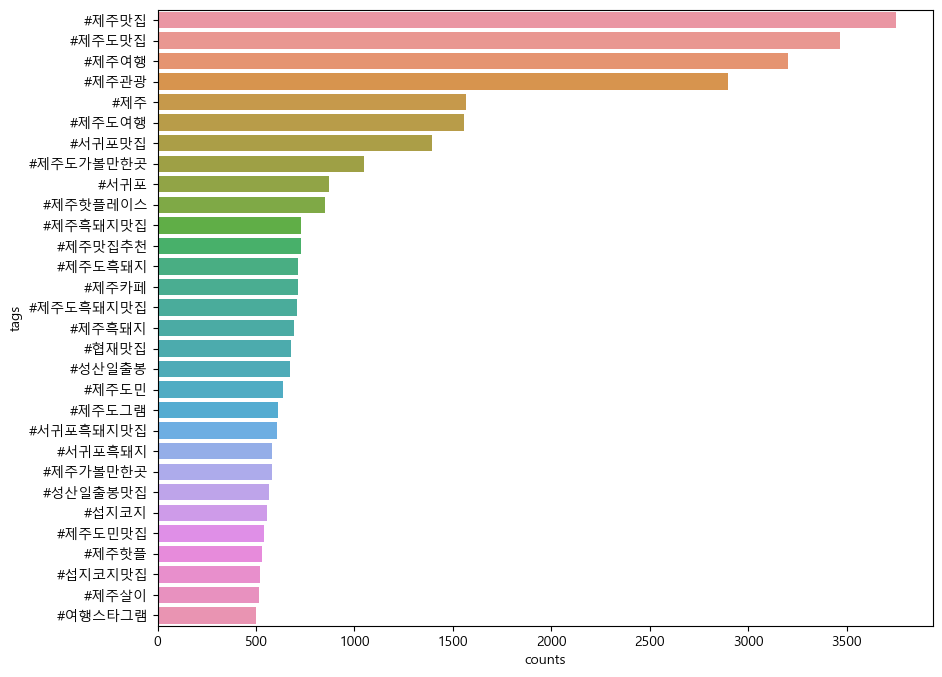

In [103]:
plt.figure(figsize = (10, 8))
sns.barplot(x = "counts", y = "tags", data = tag_counts_df)
plt.show()

### 워드클라우드

In [104]:
wordcloud = WordCloud(
    font_path = font_path,
    background_color = "white", # 배경색
    max_words = 100, # 최대 몇 개의 단어를 나타낼 것인지
    # 워드클라우드 내 글자들의 상대적인 크기(0~1), 
    # 0에 가까울수록 순위, 1에 가까울수록 빈도수에 영향을 받음
    relative_scaling = 0.3,
    width = 800,
    height = 400).generate_from_frequencies(tag_counts_selected)

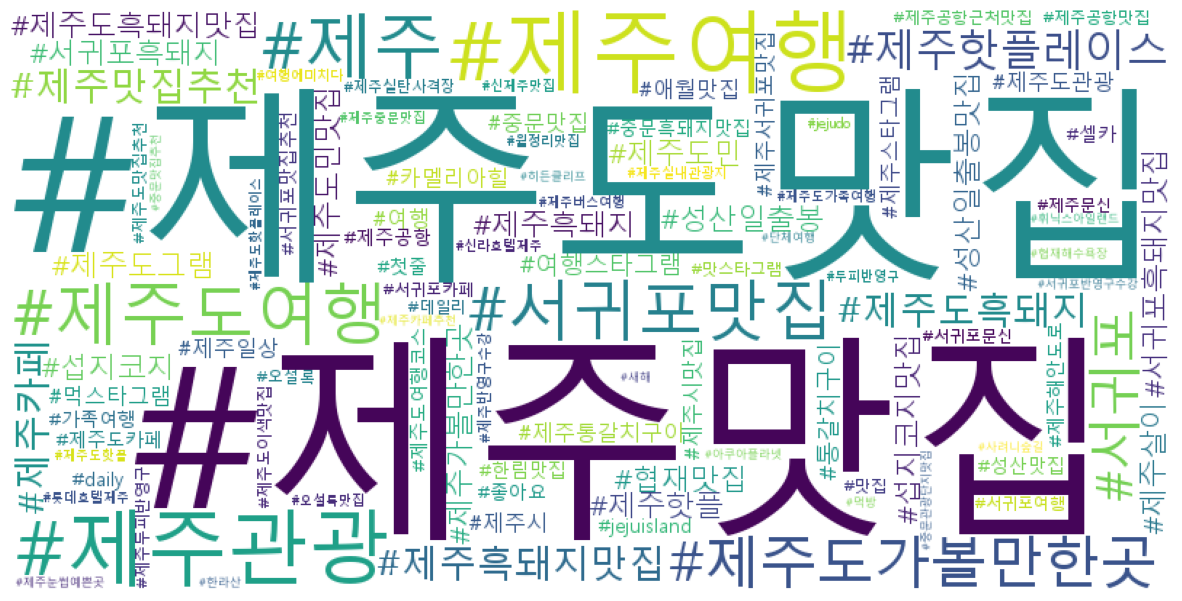

In [105]:
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tag-worldcloud.png") # 시각화 파일 저장
plt.show()

### 지도 시각화

In [106]:
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


### 위치정보 정리

In [107]:
location_counts = raw_total["place"].value_counts()
location_counts

place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
제주마당                      1
형제섬                       1
동복해녀식당                    1
종로 광장시장                   1
디스이즈핫                     1
Name: count, Length: 1028, dtype: int64

In [108]:
location_counts_df = pd.DataFrame(location_counts)

In [109]:
location_counts_df.head()

,count
place,
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [110]:
# 위치 정보의 종류 확인
location_counts_df.index

Index(['Jeju', 'Jeju-do', 'Jungle Book by Alice', 'Seogwipo', '제주도 크리스마스 박물관',
       '할로비치', '제주에인감귤밭', 'Jeju Island', '성산일출봉 城山日出峰  Seongsan Ilchulbong',
       '폼포코식당_pompokokitchen',
       ...
       '하이클래스 제주 (Hiclass Jeju)', '모닝딜라이트제주광양점', '하림각', '맥도날드장안사거리점', '탕196',
       '제주마당', '형제섬', '동복해녀식당', '종로 광장시장', '디스이즈핫'],
      dtype='object', name='place', length=1028)

In [111]:
location_counts_df.shape

(1028, 1)

#### 카카오 api로 위경도 받아오기

In [112]:
url = "https://dapi.kakao.com/v2/local/search/keyword.json"

headers = {"Authorization" : "KakaoAK c26f3791f3e194b76f75bfae46a00dda"} # api key

params = {"query" : "코리아it신촌"}

places = requests.get(url, headers = headers, params = params)

In [113]:
data = places.json()

In [114]:
data["documents"][0]

{'address_name': '서울 마포구 노고산동 106-89',
 'category_group_code': 'AC5',
 'category_group_name': '학원',
 'category_name': '교육,학문 > 학원 > 컴퓨터학원',
 'distance': '',
 'id': '112974234',
 'phone': '02-313-7300',
 'place_name': '코리아IT아카데미 신촌점',
 'place_url': 'http://place.map.kakao.com/112974234',
 'road_address_name': '서울 마포구 서강로 136',
 'x': '126.93578664586859',
 'y': '37.554041546037986'}

In [115]:
data["documents"][0]["place_name"]

'코리아IT아카데미 신촌점'

In [116]:
data["documents"][0]["x"]

'126.93578664586859'

In [117]:
data["documents"][0]["y"]

'37.554041546037986'

In [118]:
def find_places(searching):
    url = "https://dapi.kakao.com/v2/local/search/keyword.json"
    headers = {"Authorization" : "KakaoAK c26f3791f3e194b76f75bfae46a00dda"} # api key
    params = {"query" : searching}
    res = requests.get(url, headers = headers, params = params)
    
    # 필요한 정보 추출
    place = res.json()["documents"][0]
    
    name = place["place_name"]
    x = place["x"]
    y = place["y"]
    
    return [name, x, y, searching]

In [119]:
# 함수 테스트
data = find_places("제주공항")
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

#### 인스타그램 위치 좌표 수집

In [ ]:
# 인스타그램 위치 좌표 수집
location_inform = []

for location in tqdm(location_counts_df.index):
    # 검색 결과가 나오지 않는 곳도 있음
    try:
        data = find_places(location)
        location_inform.append(data)
        time.sleep(0.1)
        
    except IndexError as e:
        print(location)
        time.sleep(0.1)

  0%|▏                                                                                | 2/1028 [00:00<06:44,  2.54it/s]

Jeju-do


  0%|▏                                                                                | 3/1028 [00:01<06:32,  2.61it/s]

Jungle Book by Alice


  1%|▋                                                                                | 9/1028 [00:03<06:30,  2.61it/s]

성산일출봉 城山日出峰  Seongsan Ilchulbong


  1%|▊                                                                               | 10/1028 [00:03<06:28,  2.62it/s]

폼포코식당_pompokokitchen


  1%|▉                                                                               | 12/1028 [00:04<06:27,  2.63it/s]

Nimome


  2%|█▋                                                                              | 22/1028 [00:08<06:14,  2.69it/s]

제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地


  2%|█▊                                                                              | 23/1028 [00:08<06:14,  2.69it/s]

제주고궁한복카페 jeju gogung hanbok studio


  3%|██▎                                                                             | 29/1028 [00:10<06:18,  2.64it/s]

김녕미로공원 Jeju Kimnyoung Maze Park


  3%|██▍                                                                             | 31/1028 [00:11<06:36,  2.51it/s]

제주 성산 신산포구자연산횟집 회포장


  5%|███▊                                                                            | 49/1028 [00:19<06:20,  2.57it/s]

위미2리 동백군락지


  5%|███▉                                                                            | 50/1028 [00:19<06:14,  2.61it/s]

Jeju Island 제주특별자치도 济州道


  5%|████▏                                                                           | 54/1028 [00:21<06:00,  2.70it/s]

한라산 (漢拏山, Hallasan)


  6%|████▌                                                                           | 59/1028 [00:22<05:58,  2.71it/s]

월정리카페콧수염


  6%|████▋                                                                           | 60/1028 [00:23<05:56,  2.72it/s]

牛岛 Udo Island 우도


  6%|█████▏                                                                          | 66/1028 [00:25<05:57,  2.69it/s]

제주 꿈꾸는고래 스쿠버&게스트하우스


  7%|█████▎                                                                          | 68/1028 [00:26<05:58,  2.68it/s]

Casa Linda Guesthouse-까사 린다 펜션


  7%|█████▎                                                                          | 69/1028 [00:26<05:54,  2.70it/s]

고집돌우럭-gozipfish


  7%|█████▍                                                                          | 70/1028 [00:27<06:00,  2.66it/s]

the cliff jeju - 더클리프 제주


  9%|███████                                                                         | 90/1028 [00:34<06:22,  2.46it/s]

퍼시픽랜드 - Pacific Land JEJU


  9%|███████▌                                                                        | 97/1028 [00:37<05:55,  2.62it/s]

함덕487


 10%|███████▋                                                                        | 99/1028 [00:38<05:48,  2.66it/s]

Paris, France


 10%|███████▊                                                                       | 101/1028 [00:39<05:58,  2.59it/s]

커피캄머


 10%|███████▉                                                                       | 103/1028 [00:39<05:51,  2.63it/s]

아날로그감귤체험


 10%|███████▉                                                                       | 104/1028 [00:40<05:48,  2.65it/s]

탐라반상


 10%|████████▏                                                                      | 107/1028 [00:41<05:51,  2.62it/s]

성산일출봉 게스트하우스 파티 띵까게스트하우스


 11%|████████▎                                                                      | 108/1028 [00:41<05:55,  2.59it/s]

Busan, South Korea


 11%|████████▍                                                                      | 109/1028 [00:42<05:59,  2.56it/s]

새별오름 (Saebyul Orum)


 11%|████████▍                                                                      | 110/1028 [00:42<05:58,  2.56it/s]

해발1950m 한라산 백록담


 11%|████████▉                                                                      | 117/1028 [00:45<05:48,  2.61it/s]

Sunnyside Beachclub Jeju


 11%|█████████                                                                      | 118/1028 [00:45<05:46,  2.63it/s]

The Shilla Jeju


 12%|█████████▏                                                                     | 119/1028 [00:46<05:40,  2.67it/s]

함덕반하다


 12%|█████████▎                                                                     | 121/1028 [00:46<05:39,  2.67it/s]

몽상드 애월 (Mônsant)


 13%|██████████▍                                                                    | 136/1028 [00:52<06:02,  2.46it/s]

Jeju horse Riding farm


 13%|██████████▌                                                                    | 138/1028 [00:53<06:10,  2.40it/s]

환상의 섬 Jeju Island


 14%|██████████▊                                                                    | 141/1028 [00:54<05:50,  2.53it/s]

커피파인더coffeefinder제주시청


 14%|██████████▉                                                                    | 143/1028 [00:55<05:57,  2.48it/s]

Seoul, South Korea


 14%|███████████▏                                                                   | 146/1028 [00:56<05:47,  2.54it/s]

Harmduck Beach in Jeju Island


 14%|███████████▎                                                                   | 148/1028 [00:57<05:45,  2.55it/s]

스윗슬로cafe


 15%|███████████▌                                                                   | 150/1028 [00:58<05:37,  2.60it/s]

하례정원


 15%|███████████▊                                                                   | 154/1028 [00:59<05:36,  2.60it/s]

Guzasien -구좌지앵


 16%|████████████▌                                                                  | 164/1028 [01:03<05:31,  2.61it/s]

천지연폭포 (Cheonjiyeon Waterfall)


 18%|██████████████▏                                                                | 185/1028 [01:11<05:21,  2.62it/s]

제주 서귀포 그릴 데미그라스


 18%|██████████████▎                                                                | 187/1028 [01:12<05:37,  2.49it/s]

Meal Table Garden


 19%|██████████████▋                                                                | 191/1028 [01:13<05:11,  2.69it/s]

하얏트 리젠시 제주ㅣHyatt Regency Jeju


 20%|███████████████▌                                                               | 202/1028 [01:18<05:05,  2.70it/s]

Hotel Alfonso XIII, a Luxury Collection Hotel, Seville


 20%|███████████████▌                                                               | 203/1028 [01:18<05:06,  2.70it/s]

탐나버거


 20%|███████████████▊                                                               | 205/1028 [01:19<05:03,  2.71it/s]

보엠 - Bohème


 21%|████████████████▎                                                              | 212/1028 [01:21<05:15,  2.58it/s]

그러므로part.2


 21%|████████████████▌                                                              | 215/1028 [01:23<05:10,  2.62it/s]

광안리 해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea


 21%|████████████████▊                                                              | 218/1028 [01:24<05:08,  2.63it/s]

핏제리아마노


 21%|████████████████▊                                                              | 219/1028 [01:24<05:10,  2.61it/s]

Ulsan, South Korea


 22%|█████████████████▋                                                             | 230/1028 [01:28<04:58,  2.67it/s]

애월해안가


 23%|██████████████████                                                             | 235/1028 [01:30<04:49,  2.74it/s]

Jeju_Gimnyeong_Maze_Park


 23%|██████████████████▏                                                            | 236/1028 [01:30<04:50,  2.73it/s]

동굴카페 다희연(Cafe Daheeyeon in the Cave)


 24%|██████████████████▋                                                            | 243/1028 [01:33<05:04,  2.58it/s]

Daegu, South Korea


 24%|███████████████████▎                                                           | 251/1028 [01:36<05:17,  2.45it/s]

다다의작은공간


 25%|███████████████████▉                                                           | 260/1028 [01:40<05:03,  2.53it/s]

붉은못허브팜 Cafe Redpond 애월본점


 25%|████████████████████▏                                                          | 262/1028 [01:41<04:51,  2.63it/s]

In [ ]:
location_inform

In [ ]:
# 위치 정보 저장
location_inform_df = pd.DataFrame(location_inform)
location_inform_df.columns = ["카카오지도위치명", "경도", "위도", "인스타위치명"]

In [ ]:
location_inform_df.head()

#### 위치 정보별 인스타 게시량

In [ ]:
location_inform_df.head(2)

In [ ]:
location_counts_df.head(2)

In [ ]:
location_data = pd.merge(location_inform_df, location_counts_df, left_on = "인스타위치명",
                        right_index = True) # Location_counts_df에서는 인덱스를 기준으로 병합

In [ ]:
location_data.head()

In [ ]:
# 카카오지도위치명 중복 확인
location_data["카카오지도위치명"].value_counts()

In [ ]:
location_data[location_data["카카오지도위치명"] == "올레길 7코스(서귀포-월평 올레)"]

In [ ]:
# 장소 이름 기준 병합(중복 제거)
location_data = location_data.pivot_table(
    index = ["카카오지도위치명", "경도", "위도"],
    values = "count",
    aggfunc = "sum")

In [ ]:
location_data.head()

In [ ]:
location_data = location_data.reset_index()

In [ ]:
location_data.head()

In [ ]:
location_data.info()

#### 지도 시각화

In [ ]:
Mt_Hanla = [33.3625, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

map_jeju

for i in range(len(location_data)):
    name = location_data["카카오지도위치명"][i] # 공식 명칭
    count = location_data["count"][i] # 게시글 개수
    size = int(count) * 2
    long = float(location_data["위도"][i])
    lat = float(location_data["경도"][i])
    folium.CircleMarker((long, lat), radius = size, color = "aquamarine",
                       popup = name).add_to(map_jeju)

In [ ]:
map_jeju

#### 그룹으로 지도 시각화

- 서클마커는 특정 지역에 너무 몰려있을 경우 개별 위치를 확인하기 어려움
    - 인접한 서클마커들끼리 그룹으로 묶어서 표현

In [ ]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data["위도"]), float(data["경도"])))
    names.append(data["카카오지도위치명"])

In [ ]:
locations

In [ ]:
names

In [ ]:
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
    locations = locations,
    popups = names,
    name = "jeju",
    overlay = True,
    control = True)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

In [ ]:
map_jeju2